In [21]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

def plot_ROC(bundled_data, title, save_path):
    plt.figure(figsize=(6, 6))
    lw = 2
    for roc_auc, roc_auc_sd, mean_fpr, mean_tpr, sample, color in bundled_data:
        plt.plot(mean_fpr, mean_tpr, color=color,
                 lw=lw, label="{0} ({1:0.2f})".format(sample, roc_auc),
                #  lw=lw, label="{0} ({1:0.2f} $\pm$ {2:0.2f})".format(sample, roc_auc, roc_auc_sd)
                 )
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(title, fontsize=18)
    plt.legend(fontsize=13,
               title='AUC median by\nfivefold cross-validation',
            #    title='AUC average $\pm$ standard error\nby fivefold cross-validation', 
               loc="lower right")
    ax = plt.gca()  # get current axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

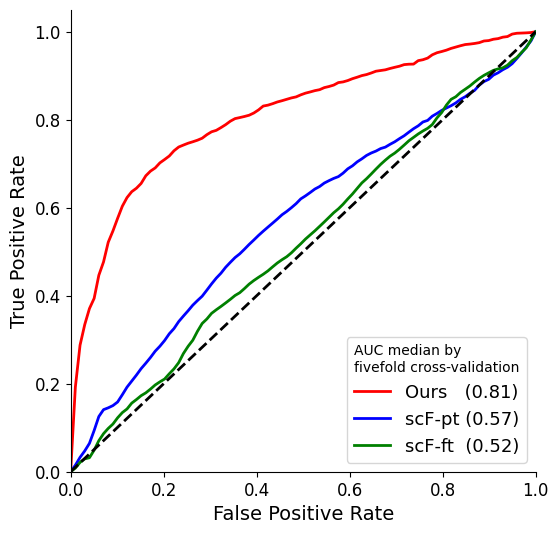

In [25]:
bundled_data = []
color_list = ['red', 'blue', 'green']
legend_list = ['Ours  ', 'scF-pt', 'scF-ft ']

dataset = 'human_myocardial_infarction' #'VISDP000013'
slide = '10X001'
save_path = f'lrc_{slide}_random0_median.pdf'
title = 'Ligand-receptor pairs classification\n(average ROC)'

num = 0
for method in ['stformer', 'scf-pt', 'scf-ft']:
    cv_results = pickle.load(open(f'{method}_lrc_{slide}_random0.pkl', 'rb'))
    # roc_auc, roc_auc_sd, mean_fpr, mean_tpr, all_roc_auc, wts = cv_results.values()
    # bundled_data += [(roc_auc, roc_auc_sd, mean_fpr, mean_tpr, legend_list[num], color_list[num])]
    roc_auc_mean, roc_auc_sd, roc_auc_median, mean_fpr, mean_tpr, median_tpr, all_roc_auc, wts = cv_results.values()
    bundled_data += [(roc_auc_median, roc_auc_sd, mean_fpr, median_tpr, legend_list[num], color_list[num])]
    num += 1

plot_ROC(bundled_data, title, save_path)